<a href="https://colab.research.google.com/github/sunnie720/DL_study/blob/main/temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Pressure (millibars) : min값 0인 것은 사실 결측치

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('regression1_train.csv')
test = pd.read_csv('regression1_test.csv')
data.shape, test.shape

((67517, 11), (28936, 10))

In [ ]:
display(data.head())
display(test.head())

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature
0,Partly Cloudy,rain,15.950000,0.61,17.2914,340.0,16.1000,0.0,1021.11,Partly cloudy starting in the morning continui...,15.950000
1,Mostly Cloudy,rain,28.944444,0.35,14.4095,239.0,10.3684,0.0,1014.82,Mostly cloudy throughout the day.,29.738889
2,Partly Cloudy,rain,26.522222,0.29,14.4900,300.0,9.9820,0.0,1021.40,Partly cloudy starting in the morning.,27.222222
3,Mostly Cloudy,rain,-0.161111,0.77,10.3362,351.0,9.4507,0.0,1016.29,Foggy starting overnight continuing until morn...,2.688889
4,Mostly Cloudy,rain,6.511111,0.69,5.7638,75.0,10.3523,0.0,1028.55,Mostly cloudy until night.,7.350000


,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,2.872222,0.89,4.5724,43.0,9.8049,0.0,1016.35,Partly cloudy until night.
1,Mostly Cloudy,rain,18.416667,0.38,30.4612,148.0,13.0249,0.0,1011.08,Mostly cloudy throughout the day and breezy in...
2,Partly Cloudy,rain,16.244444,0.41,10.5616,48.0,9.9820,0.0,1017.88,Partly cloudy starting in the morning continui...
3,Clear,rain,30.155556,0.33,17.7100,220.0,9.9820,0.0,1013.40,Partly cloudy in the morning.
4,Mostly Cloudy,rain,22.188889,0.63,3.0751,139.0,10.3523,0.0,1017.19,Foggy starting overnight continuing until morn...


In [ ]:
display(data.tail())
display(test.tail())

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Temperature
67512,Breezy and Overcast,rain,-6.105556,0.72,32.8601,28.0,14.1036,0.0,1021.44,Breezy overnight and overcast throughout the day.,0.483333
67513,Partly Cloudy,rain,19.977778,0.73,17.2753,270.0,11.2700,0.0,1006.44,Partly cloudy until night.,19.977778
67514,Mostly Cloudy,rain,25.066667,0.50,9.8210,191.0,16.1000,0.0,1013.97,Mostly cloudy starting in the morning.,25.066667
67515,Partly Cloudy,rain,19.888889,0.61,10.5616,134.0,11.3988,0.0,1018.99,Mostly cloudy throughout the day.,19.888889
67516,Mostly Cloudy,rain,17.272222,0.93,5.1037,349.0,10.3523,0.0,1008.52,Mostly cloudy throughout the day.,17.272222


,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
28931,Mostly Cloudy,rain,17.822222,0.78,4.7978,201.0,16.1000,0.0,1016.78,Partly cloudy starting in the morning.
28932,Mostly Cloudy,rain,-3.211111,0.70,24.2305,359.0,9.9820,0.0,1008.10,Mostly cloudy throughout the day.
28933,Partly Cloudy,rain,8.588889,0.99,3.7191,283.0,14.9569,0.0,1022.45,Partly cloudy throughout the day.
28934,Partly Cloudy,rain,5.094444,0.86,11.1251,215.0,11.2056,0.0,1016.16,Mostly cloudy throughout the day.
28935,Mostly Cloudy,rain,0.761111,0.82,12.8800,300.0,8.0500,0.0,1024.20,Partly cloudy starting in the morning.


In [ ]:
display(data.Summary.value_counts())
display(test.Summary.value_counts())

Partly Cloudy                          22181
Mostly Cloudy                          19670
Overcast                               11622
Clear                                   7672
Foggy                                   4985
Breezy and Mostly Cloudy                 371
Breezy and Overcast                      366
Breezy and Partly Cloudy                 264
Dry and Partly Cloudy                     60
Windy and Partly Cloudy                   44
Light Rain                                41
Breezy                                    34
Windy and Overcast                        31
Humid and Mostly Cloudy                   27
Windy and Mostly Cloudy                   27
Breezy and Foggy                          26
Drizzle                                   25
Dry                                       24
Humid and Partly Cloudy                   13
Dry and Mostly Cloudy                     10
Windy                                      8
Humid and Overcast                         6
Rain      

Partly Cloudy               9552
Mostly Cloudy               8424
Overcast                    4975
Clear                       3218
Foggy                       2163
Breezy and Overcast          162
Breezy and Mostly Cloudy     145
Breezy and Partly Cloudy     122
Dry and Partly Cloudy         26
Windy and Partly Cloudy       23
Light Rain                    22
Breezy                        20
Drizzle                       14
Windy and Overcast            14
Humid and Mostly Cloudy       13
Dry                           10
Breezy and Foggy               9
Windy and Mostly Cloudy        8
Rain                           4
Humid and Partly Cloudy        4
Dry and Mostly Cloudy          4
Windy and Foggy                2
Breezy and Dry                 1
Humid and Overcast             1
Name: Summary, dtype: int64

In [ ]:
set(data.Summary.unique()) == set(test.Summary.unique())

False

In [ ]:
data['Daily Summary'][0]

'Partly cloudy starting in the morning continuing until night.'

In [ ]:
display(data.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67517 entries, 0 to 67516
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   67517 non-null  object 
 1   Precip Type               67131 non-null  object 
 2   Apparent Temperature (C)  67517 non-null  float64
 3   Humidity                  67517 non-null  float64
 4   Wind Speed (km/h)         67517 non-null  float64
 5   Wind Bearing (degrees)    67517 non-null  float64
 6   Visibility (km)           67517 non-null  float64
 7   Loud Cover                67517 non-null  float64
 8   Pressure (millibars)      67517 non-null  float64
 9   Daily Summary             67517 non-null  object 
 10  Temperature               67517 non-null  float64
dtypes: float64(8), object(3)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28936 entries, 0 to 28935
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   28936 non-null  object 
 1   Precip Type               28805 non-null  object 
 2   Apparent Temperature (C)  28936 non-null  float64
 3   Humidity                  28936 non-null  float64
 4   Wind Speed (km/h)         28936 non-null  float64
 5   Wind Bearing (degrees)    28936 non-null  float64
 6   Visibility (km)           28936 non-null  float64
 7   Loud Cover                28936 non-null  float64
 8   Pressure (millibars)      28936 non-null  float64
 9   Daily Summary             28936 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.2+ MB


None

In [ ]:
display(data.isna().sum())
display(test.isna().sum())

Summary                       0
Precip Type                 386
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
Temperature                   0
dtype: int64

Summary                       0
Precip Type                 131
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
display(data['Precip Type'].value_counts())
display(test['Precip Type'].value_counts())

rain    59662
snow     7469
Name: Precip Type, dtype: int64

rain    25562
snow     3243
Name: Precip Type, dtype: int64

In [ ]:
display(data.describe())
display(test.describe())

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Temperature
count,67517.000000,67517.000000,67517.000000,67517.000000,67517.000000,67517.0,67517.000000,67517.000000
mean,10.854737,0.734836,10.803517,187.792645,10.340999,0.0,1003.089170,11.931343
std,10.707271,0.195437,6.910353,107.160567,4.192611,0.0,117.696359,9.567072
min,-26.227778,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-21.822222
25%,2.266667,0.600000,5.828200,117.000000,8.339800,0.0,1011.930000,4.583333
50%,11.950000,0.780000,9.917600,180.000000,10.046400,0.0,1016.470000,11.950000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.100000,18.838889
max,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,39.905556


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,28936.000000,28936.000000,28936.000000,28936.000000,28936.000000,28936.0,28936.000000
mean,10.855710,0.735047,10.827260,186.847940,10.362086,0.0,1003.578456
std,10.672670,0.195560,6.921164,107.900607,4.191021,0.0,115.258341
min,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.411111,0.610000,5.812100,111.750000,8.355900,0.0,1011.840000
50%,12.066667,0.780000,10.046400,180.000000,10.046400,0.0,1016.400000
75%,18.822222,0.890000,14.135800,290.000000,14.876400,0.0,1021.030000
max,38.416667,1.000000,55.931400,359.000000,16.100000,0.0,1045.780000


In [ ]:
# Precip Type 결측치 'no precipitation'으로 대체
data['Precip Type'].fillna('no precipitation', inplace=True)
test['Precip Type'].fillna('no precipitation', inplace=True)

# Loud Cover 삭제
data.drop('Loud Cover', axis=1, inplace=True)
test.drop('Loud Cover', axis=1, inplace=True)

In [ ]:
data.columns

Index(['Summary', 'Precip Type', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Daily Summary', 'Temperature'],
      dtype='object')

In [ ]:
# cat, num 분리
cat_cols = ['Summary', 'Precip Type', 'Daily Summary']
num_cols = list(set(data.columns.to_list()).difference(set(cat_cols)))

In [ ]:
num_cols

['Temperature',
 'Pressure (millibars)',
 'Humidity',
 'Apparent Temperature (C)',
 'Wind Speed (km/h)',
 'Visibility (km)',
 'Wind Bearing (degrees)']

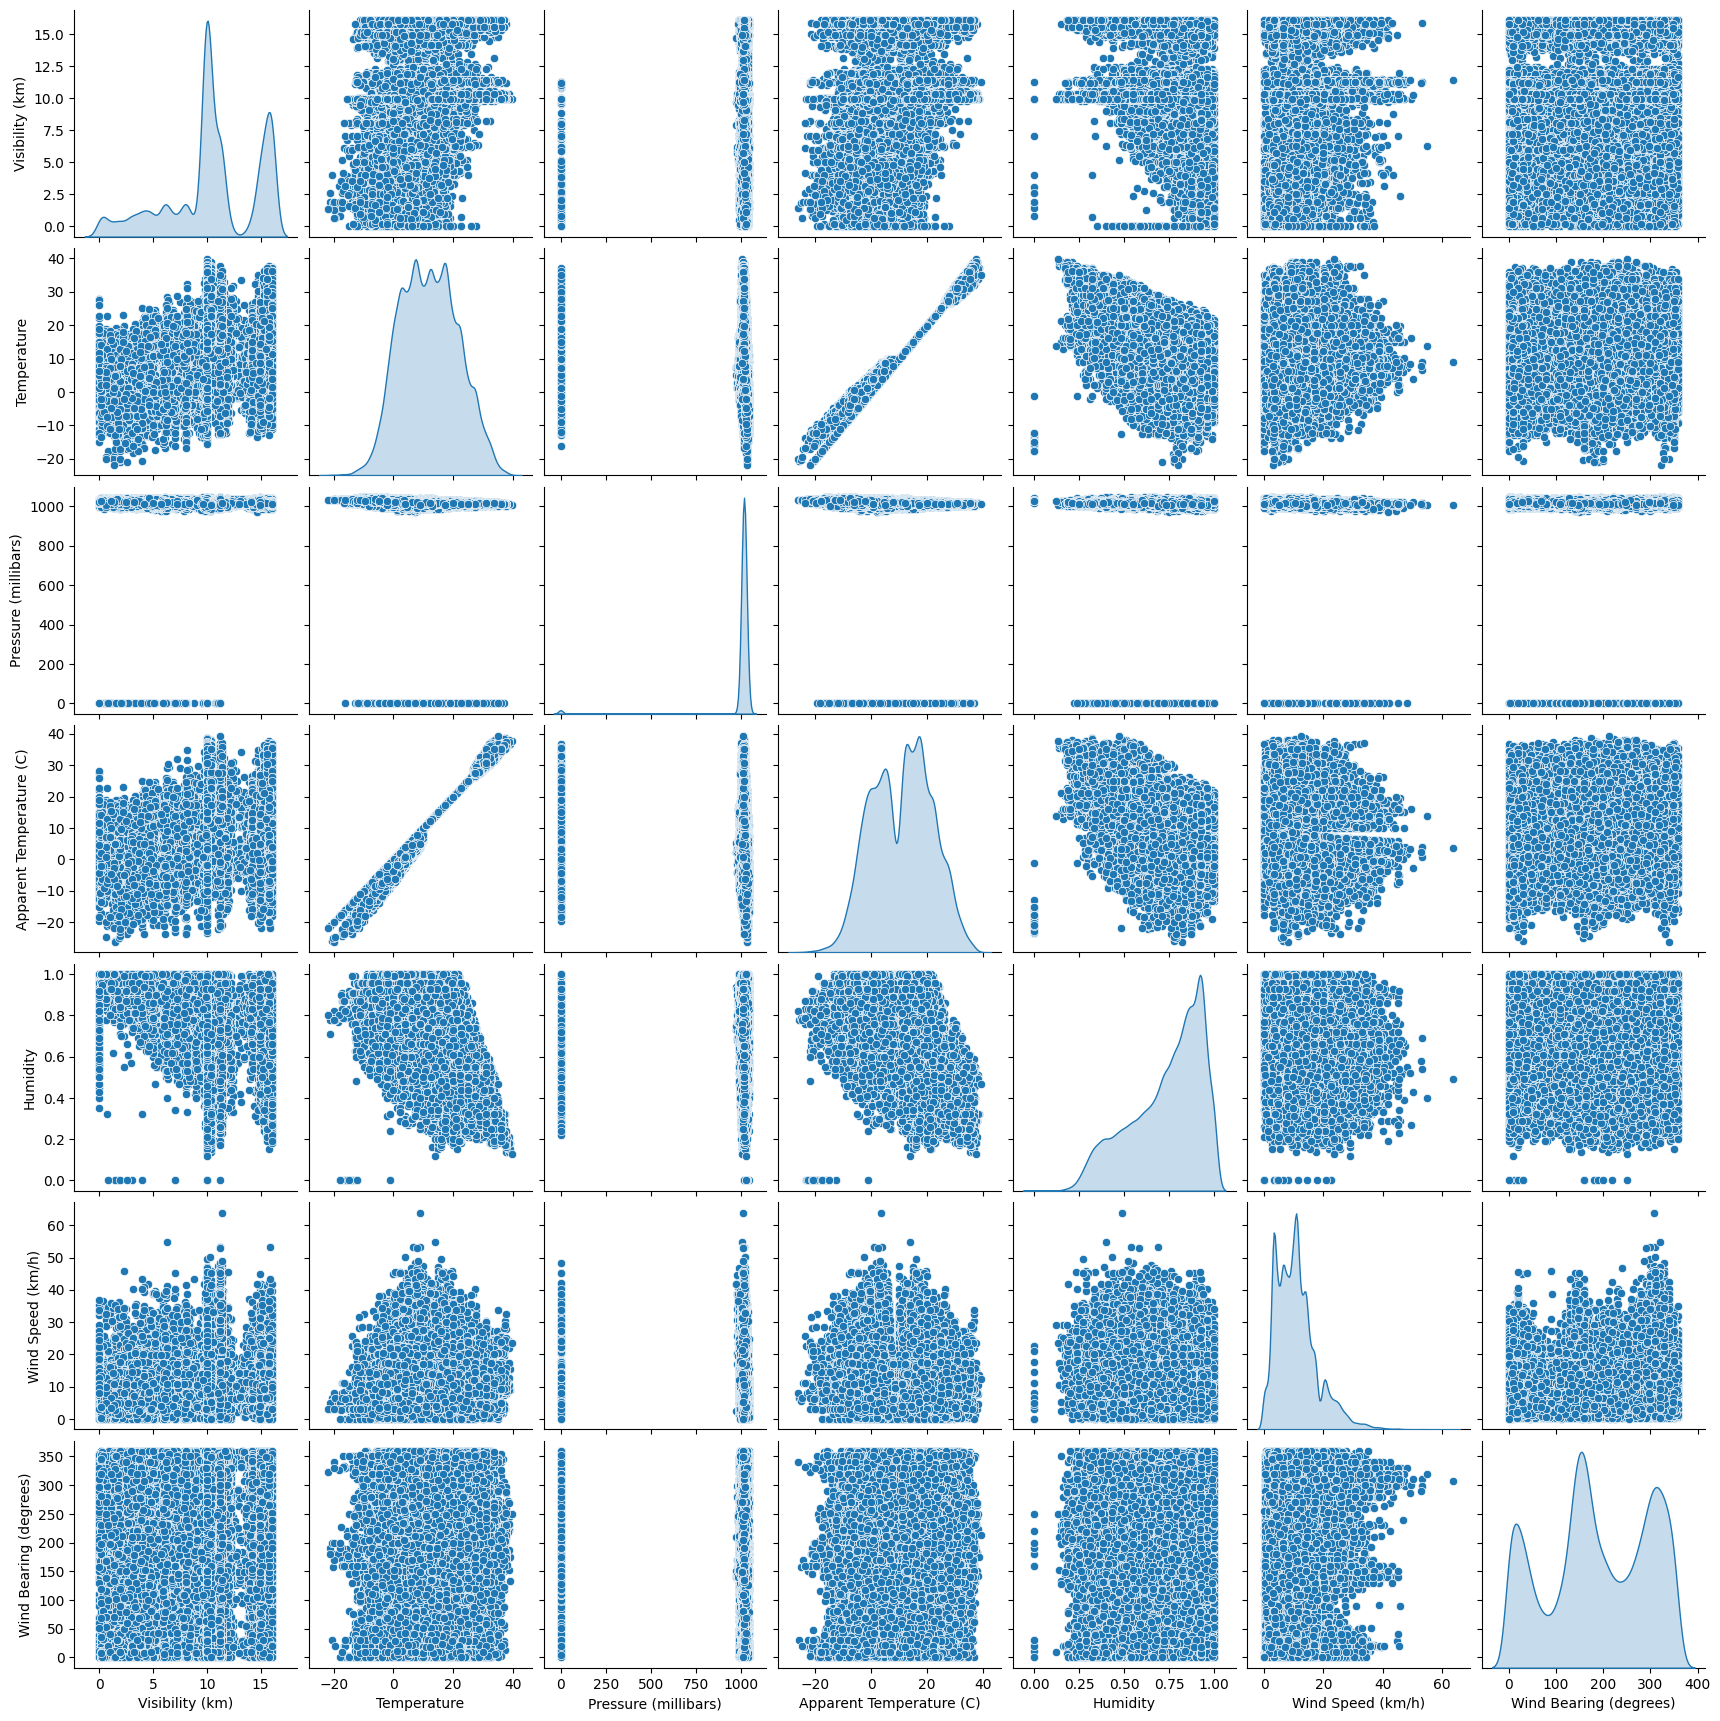

In [ ]:
sns.pairplot(data[num_cols], diag_kind='kde')
plt.show()

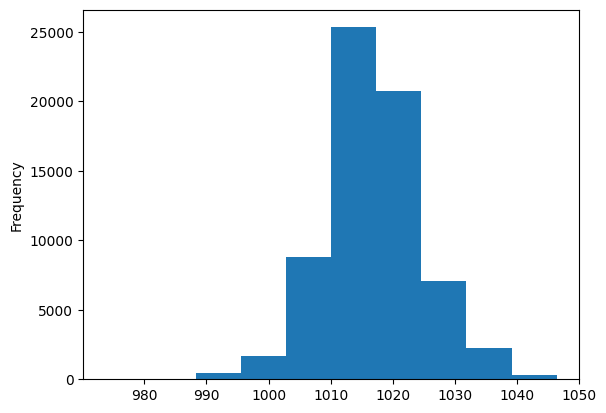

In [ ]:
data[data['Pressure (millibars)']>750]['Pressure (millibars)'].plot(kind='hist')
plt.show()

### baseline

In [ ]:
# train, val 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data.drop(['Summary','Daily Summary','Temperature'], axis=1),
                                                  data['Temperature'],
                                                  test_size=0.25,
                                                  shuffle=True,
                                                  random_state=42)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((50637, 7), (16880, 7), (50637,), (16880,))

In [ ]:
x_test = test.drop(['Summary','Daily Summary'], axis=1).copy()
x_test.shape

(28936, 7)

In [ ]:
display(x_train.head(2))
display(test.head(2))

,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
42846,rain,34.411111,0.48,10.6099,1.0,9.982,1015.20
31597,rain,14.977778,0.67,22.8137,309.0,9.982,1019.48


,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,rain,2.872222,0.89,4.5724,43.0,9.8049,1016.35,Partly cloudy until night.
1,Mostly Cloudy,rain,18.416667,0.38,30.4612,148.0,13.0249,1011.08,Mostly cloudy throughout the day and breezy in...


In [ ]:
# Precip Type one-hot encoding
x_train = pd.get_dummies(x_train, columns=['Precip Type'])
x_val = pd.get_dummies(x_val, columns=['Precip Type'])
x_test = pd.get_dummies(x_test, columns=['Precip Type'])
x_train.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_no precipitation,Precip Type_rain,Precip Type_snow
42846,34.411111,0.48,10.6099,1.0,9.9820,1015.20,0,1,0
31597,14.977778,0.67,22.8137,309.0,9.9820,1019.48,0,1,0
30970,22.755556,0.66,12.3487,200.0,11.2700,1018.14,0,1,0
9672,13.816667,0.55,8.6457,17.0,11.2056,1013.42,0,1,0
20892,-1.544444,0.84,11.3666,177.0,6.7781,1019.61,0,1,0


In [ ]:
# 더미변수들 중 하나 삭제
x_train.drop(['Precip Type_no precipitation'], axis=1, inplace=True)
x_val.drop(['Precip Type_no precipitation'], axis=1, inplace=True)
x_test.drop(['Precip Type_no precipitation'], axis=1, inplace=True)
x_train.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
42846,34.411111,0.48,10.6099,1.0,9.9820,1015.20,1,0
31597,14.977778,0.67,22.8137,309.0,9.9820,1019.48,1,0
30970,22.755556,0.66,12.3487,200.0,11.2700,1018.14,1,0
9672,13.816667,0.55,8.6457,17.0,11.2056,1013.42,1,0
20892,-1.544444,0.84,11.3666,177.0,6.7781,1019.61,1,0


In [ ]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train[:-2] = scaler.fit_transform(x_train[:-2])
x_val[:-2] = scaler.transform(x_val[:-2])
x_test[:-2] = scaler.transform(x_test[:-2])

display(x_train.head(3))
display(x_val.head(3))
display(x_test.head(3))

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
42846,0.924765,0.48,0.193312,0.002786,0.62,0.970202,1.0,0.0
31597,0.628400,0.67,0.415664,0.860724,0.62,0.974292,1.0,0.0
30970,0.747013,0.66,0.224993,0.557103,0.70,0.973012,1.0,0.0


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
26053,0.835804,0.40,0.232033,0.105850,1.000,0.969581,1.0,0.0
60507,0.483775,0.71,0.476973,0.058496,0.696,0.965815,1.0,0.0
20006,0.504363,0.83,0.227926,0.027855,0.443,0.965280,1.0,0.0


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,0.443785,0.89,0.083309,0.119777,0.609,0.971301,1.0,0.0
1,0.680844,0.38,0.555001,0.412256,0.809,0.966265,1.0,0.0
2,0.647717,0.41,0.192432,0.133705,0.620,0.972763,1.0,0.0


In [ ]:
# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [ ]:
model_lr = LinearRegression()
model_rg = Ridge(alpha=0.1)
model_ls = Lasso(alpha=0.1)
model_rf = RandomForestRegressor()
model_svr = SVR()
model_dt = DecisionTreeRegressor()
model_knn = KNeighborsRegressor()

models = [model_lr, model_rg, model_ls, model_rf, model_svr, model_dt, model_knn]
model_names = ['LinearRegression','Ridge','Lasso','RandomForestRegressor','SVR','DecisionTreeRegressor','KNeighborsRegressor']

for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    print(f'{name} RMSE: {np.sqrt(mean_squared_error(y_val, y_pred))}')

LinearRegression RMSE: 3.4662202370913384
Ridge RMSE: 3.466272268048415
Lasso RMSE: 3.3765709321011643
RandomForestRegressor RMSE: 0.14164336586636536
SVR RMSE: 0.9607161115464107
DecisionTreeRegressor RMSE: 0.17878675466933616
KNeighborsRegressor RMSE: 0.9388807299345429


In [ ]:
# RandomForestRegressor로 최종 모델링
y_pred_test = model_rf.predict(x_test)
y_pred_test

array([ 2.87255556, 18.41555556, 16.24522222, ...,  8.59422222,
       25.09927778, 23.67805556])

In [ ]:
# csv로 저장
submission_base = pd.DataFrame({'Temperature':y_pred_test})
submission_base.to_csv('submission_base.csv', index=False)

### GridSearch 튜닝

In [ ]:
# GridSearch 튜닝
params = {'n_estimators':[100,200,300],
          'max_depth':[3,5,7],
          'min_samples_leaf':[1,3,5],
          'min_samples_split':[2,3,5],
          'max_features':[2,3,5]}
model_rf = RandomForestRegressor() # default : n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='auto'
grid_rf = GridSearchCV(model_rf, param_grid=params, cv=3, n_jobs=-1)
grid_rf.fit(x_train, y_train)
print(grid_rf.best_params_)
print(grid_rf.best_score_)
print(grid_rf.best_estimator_)

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 200}
0.9978574589364336
RandomForestRegressor(max_depth=7, max_features=5, min_samples_leaf=5,
                      min_samples_split=3, n_estimators=200)


In [ ]:
# 최적의 파라미터로 모델링
model_rf_best = grid_rf.best_estimator_
model_rf_best.fit(x_train, y_train)
y_pred_rf_best = model_rf_best.predict(x_val)
print(f'GridSearch RandomForestRegressor RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_rf_best))}')

GridSearch RandomForestRegressor RMSE: 0.47176202976402204
